# Prepare Inputs

# Day I - Prepare Dataformats, Grafiks, Input

## 1 Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
    div.output_scroll { resize: vertical !important;}
</style>
"""))

## 1.1 Grafiks Warmup
A small demo on how to print grafs

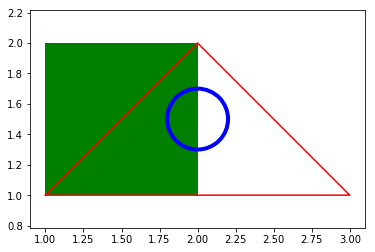

In [2]:
plt.close()  # This is a jupyter notebook. Lets reset our plotting environment

fig, ax = plt.subplots()  # a subplots environment makes it easy to add things
ax.axis('equal')  # we want axis's with proportional lengths

# a circle
circle=plt.Circle((2,1.5),0.2, fill=False, color='b', linewidth=4)
ax.add_artist(circle)

# a filled square
ax.fill([1, 2, 2, 1,1], [1, 1, 2, 2,1],'green')

# a polygon (a triangle in this case)
ax.plot([1,3,2,1],[1,1,2,1], 'red')

# show our figure
plt.show()

# done
plt.close()

## 1.2 Data-Format
### 1.2.1 Start with a python data structure to keep things simple

In [3]:
factory_map = {}
# 0-based!
factory_map ['shape'] = (20,40)    # how many fields in width and height (x,y)
factory_map ['start'] = (10, 3)       # which is my starting field (x,y)?
factory_map ['goal'] = (12, 30)     # which is my finishing field (x,y)?
obs = []
for x in range (20):
    if x not in (11,12,13):
        obs.append ((x,23))
for x in range (10,15):
    obs.append ((x, 26))
factory_map ['obstacles'] = obs

## 1.3.2 Generate json as an example 

In [4]:
with open('example-factory.json', 'w') as outfile:
    json.dump(factory_map, outfile)
    outfile.close()

## 1.2.3 Read example json file

In [5]:
with open('example-factory.json', 'r') as infile:
    loaded_factory = json.load(infile)
    infile.close()
print (loaded_factory)

{'shape': [20, 40], 'start': [10, 3], 'goal': [12, 30], 'obstacles': [[0, 23], [1, 23], [2, 23], [3, 23], [4, 23], [5, 23], [6, 23], [7, 23], [8, 23], [9, 23], [10, 23], [14, 23], [15, 23], [16, 23], [17, 23], [18, 23], [19, 23], [10, 26], [11, 26], [12, 26], [13, 26], [14, 26]]}


## 2. Print map

### Helper methods to print the factory map

In [6]:
def print_map (factory_map = None, shape = (8,15)):
    """
        :param factory_map: A dictionary with our layout
        :return: A matplotlib Axis object to print on
    """
    # prepare matplotlib:
    plt.close()  # This is a jupyter notebook. Lets reset our plotting environment
    fig, ax = plt.subplots()  # a subplots environment makes it easy to add things
    fig.set_size_inches(shape [0], shape [1])
    out = ax.axis('equal')  # we want axis's with proportional lengths
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.axis('off')
    x = int (factory_map ['shape'][0])
    y = int (factory_map ['shape'][1])
    ax.fill([0, x, x, 0,0], [0, 0, y, y,0],'whitesmoke')
    ax.plot([0, x, x, 0,0], [0, 0, y, y,0],'black', linewidth=0.5)
    for i in range (x):
        ax.plot ([i,i],[0,y], 'black', linewidth = 0.5)
        ax.text(i+0.3, -1, str (i), fontsize=12)
    for j in range (y):
        ax.plot ([0,x],[j,j], 'black', linewidth = 0.5)
        ax.text(-1, j+0.3, str (j), fontsize=12)
    print_square (factory_map['start'][0], factory_map['start'][1], ax, 'lightgreen')
    ax.text(factory_map['start'][0] + 0.1, factory_map['start'][1] - 0.75, 'Start', fontsize=12)
    print_square (factory_map['goal'][0], factory_map['goal'][1], ax, 'pink')
    ax.text(factory_map['goal'][0] + 0.1, factory_map['goal'][1] + 1.2, 'Goal', fontsize=12)
    for field in factory_map ['obstacles']:
        print_square (field [0], field [1], ax,'blue')
    return ax

def print_square (x=0,y=0, ax=None, color='black'):
    """
        :param x: x-position in our factory map
        :param y: y-position in our factory map
        :param ax: A matplotlib Axis object to print on
        :param color: color to print square
        :return:
    """
    ax.fill([x, x+1, x+1, x,x], [y, y, y+1, y+1,y],color)

### Prepare things

In [7]:
# assume factory is our already loaded dictionary from above
print ('Our factory map layout:\n{}'.format (loaded_factory))

Our factory map layout:
{'shape': [20, 40], 'start': [10, 3], 'goal': [12, 30], 'obstacles': [[0, 23], [1, 23], [2, 23], [3, 23], [4, 23], [5, 23], [6, 23], [7, 23], [8, 23], [9, 23], [10, 23], [14, 23], [15, 23], [16, 23], [17, 23], [18, 23], [19, 23], [10, 26], [11, 26], [12, 26], [13, 26], [14, 26]]}


### Show map with start, goal, obstacles

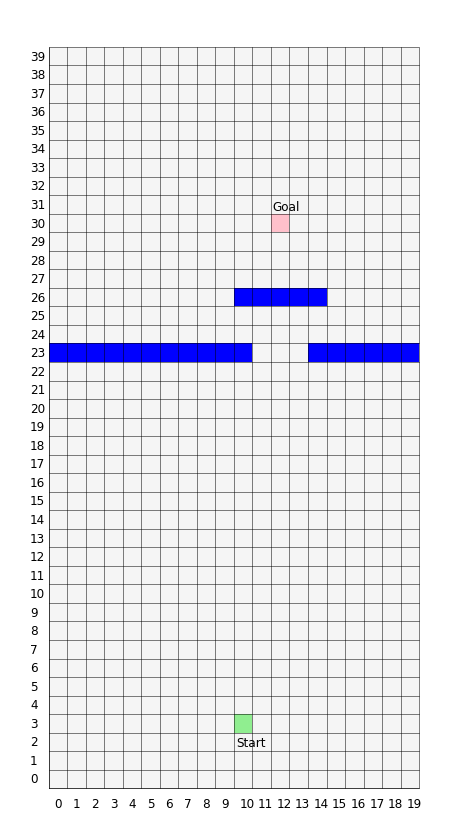

In [8]:
# call print_map
ax = print_map (factory_map)
plt.show()
plt.close()

### Movements

### Our robot has four possible movments it can make
Each movement has the same cost

* Move forward (and stop again) one field
* Move forward (and stop again) three fields
* Turn right
* Turn left

Each move will take the same amount of time

### We need some methods to print travel artefacts

In [9]:
def print_path (start, end, ax=None, color='blue', circlecolor='blue'):
    """
    Print a line from start to end with a marker on each
    :param start: a (x,y) tuple where to start
    :param end: number of fields to proceed
    :param ax: A matplotlib Axis object to print on
    :param color: color to print square
    :return:
    """
    ax.plot([start[0] + 0.5, end[0] + 0.5],[start[1]+0.5, end[1]+0.5], color, linewidth=3)
    circle=plt.Circle((start[0] + 0.5, start[1] + 0.5),0.2, fill=True, color=circlecolor, linewidth=0)
    ax.add_artist(circle)
    circle=plt.Circle((end[0] + 0.5, end[1] + 0.5),0.2, fill=True, color=circlecolor, linewidth=0)
    ax.add_artist(circle)

def print_turn (pos, ax=None, color='red'):
    """
    Print a circle around pos; use color to indicate turn left/right
    :param start: a (x,y) tuple where to start
    :param end: number of fields to proceed
    :param ax: A matplotlib Axis object to print on
    :param color: color to print square
    :return:
    """
    circle=plt.Circle((pos[0] + 0.5, pos[1] + 0.5),0.6, fill=False, color=color, linewidth=1)
    ax.add_artist(circle)


### A path plotted manually - A demonstration of all options

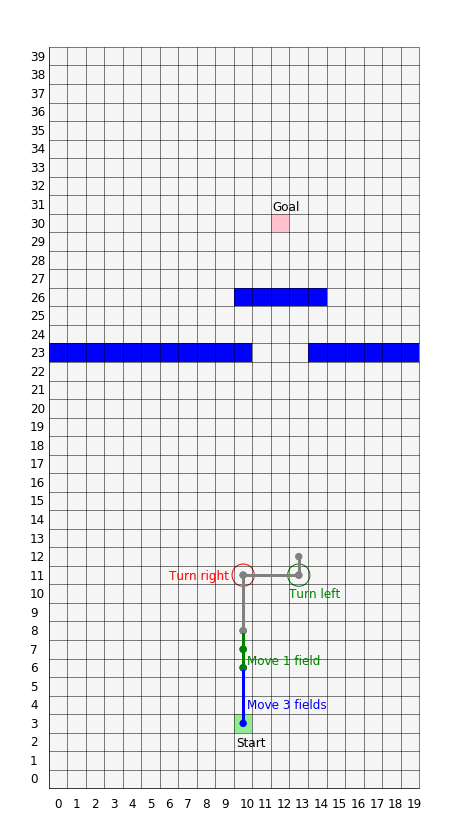

In [10]:
# call print_map
ax = print_map (factory_map)
start = factory_map ['start']
end =  (start[0], start[1]+3)
print_path (start, end, ax)
ax.text(start [0] + 0.7, start [1] + 1.3, 'Move 3 fields', fontsize=12, color='blue')
start = end
end =  (start[0], start[1]+1)
print_path (start, end, ax, 'green', 'green')
ax.text(start [0] + 0.7, start [1] + 0.7, 'Move 1 field', fontsize=12, color='green')
start = end
end =  (start[0], start[1]+1)
print_path (start, end, ax, 'green', 'green')
start = end
end =  (start[0], start[1]+3)
print_path (start, end, ax, 'gray', 'gray')
print_turn (end, ax, 'red')
ax.text(end [0] - 3.5, end [1] + 0.3, 'Turn right', fontsize=12, color='red')
start = end
end =  (start[0]+3, start[1])
print_path (start, end, ax, 'gray', 'gray')
print_turn (end, ax, 'green')
ax.text(end [0] , end [1] - 0.7, 'Turn left', fontsize=12, color='green')
start = end
end =  (start[0], start[1]+1)
print_path (start, end, ax, 'gray', 'gray')
plt.show()
plt.close()

### A Path plotted manually - Simulate printing of route

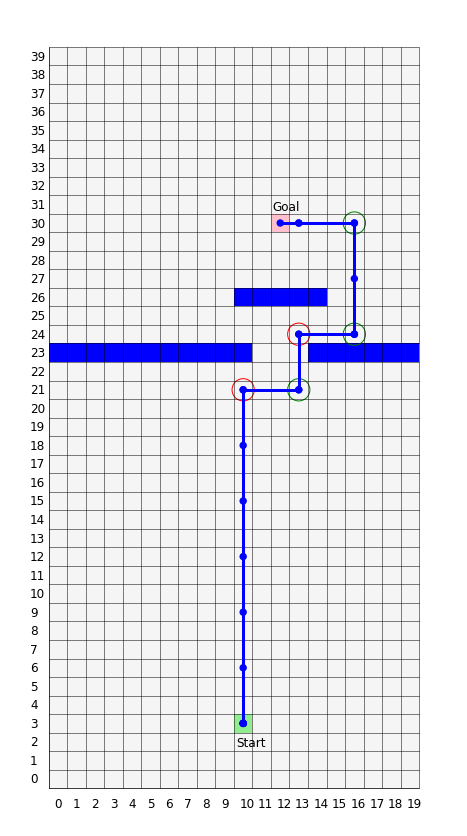

In [11]:
# call print_map
ax = print_map (factory_map)
start = factory_map ['start']
end =  (start[0], start[1]+3)
while end [1] < 23:
    print_path (start, end, ax)
    end =  (end[0], end[1]+3)
start = (end[0], end[1]-3)
print_turn (start, ax, 'red')
end = (start[0]+3, start[1])
print_path (start, end, ax)
print_turn(end,ax,'green')
start = end
end = (start[0], start[1]+3)
print_path (start, end, ax)
print_turn (end, ax, 'red')
start = end
end = (start[0]+3, start[1])
print_path (start, end, ax)
print_turn(end,ax,'green')
start = end
end =  (start[0], start[1]+3)
while end [1] <= 30:
    print_path (start, end, ax)
    end =  (end[0], end[1]+3)
start = (end[0], end[1]-3)
print_turn (start, ax, 'green')
end = (start[0]-3, start[1])
print_path (start,end, ax)
start = end
end = (start[0]-1, start[1])
print_path (start, end, ax)
plt.show()
#plt.close()

# DAY II - Pathfinding

# 3 Define a dataformat to describe a route

We now no longer want to calculate positions manually as above but automate and optimize things.

Assumptions for definition of route:
* We need a data strucuter to define the moves
* Painting them is outsourced to an other artefact of the program
* This includes start, goal and starting heading

In [12]:
import json

MOVE3 = 'm3'
MOVE1 = 'm1'
TURNL = 'tl'
TURNR = 'tr'


class MoveContainer:
    """
    A class to save and manipulate a route
    TODO: This class does not yet support checks for existence of files nor validates contents of file
    """


    def __init__(self, file_name=None, initial_moves=None):
        """
        :param file_name: if not null: A pathname to load a route from
        """
        if file_name is None:
            self.moves = []
        else:
            self.load_moves (file_name)
        if initial_moves is not None:
            self.add(initial_moves)
        return

    def add (self, moves):
        """
        :param moves: a string or a list / array of strings - add move(s) to existing route
        :return:
        """
        if not isinstance (moves, list):
            moves = [moves]
        for move in moves:
            if move not in [MOVE3, MOVE1, TURNL, TURNR]:
                raise ValueError ('Use one of the valid move constants: {}'.format (move))
            self.moves.append (move)
        return self.moves

    def dump_moves (self, file_name):
        """
        :param file_name: save the internal route to file with path file_name
        :return:
        """
        data = {}
        data['moves'] = self.moves
        with open(file_name, 'w') as outfile:
            json.dump(data, outfile)
            outfile.close()

    def load_moves (self, file_name):
        """
        :param file_name: load route from file_name
        :return:
        """
        with open(file_name, 'r') as infile:
            loaded_data = json.load(infile)
            infile.close()
        self.moves = loaded_data ['moves']
        return self.moves

In [13]:
mc = MoveContainer()
mc.add ([MOVE3, MOVE3, MOVE3, MOVE3, MOVE3,MOVE3,TURNR,MOVE3,TURNL, MOVE3, TURNR])
print (mc.add ([MOVE3, TURNL, MOVE3, MOVE3, TURNL, MOVE3,MOVE1]))

['m3', 'm3', 'm3', 'm3', 'm3', 'm3', 'tr', 'm3', 'tl', 'm3', 'tr', 'm3', 'tl', 'm3', 'm3', 'tl', 'm3', 'm1']


In [14]:
mc.dump_moves ('some_route.json')

In [15]:
route = MoveContainer ('some_route.json')
print (route.moves)

['m3', 'm3', 'm3', 'm3', 'm3', 'm3', 'tr', 'm3', 'tl', 'm3', 'tr', 'm3', 'tl', 'm3', 'm3', 'tl', 'm3', 'm1']


# 4 print moves from Move_Container

Assummtions:
* We want to define a class that supports moving around
* Let's use this class to
    * Print a route
    * Just move around without printing
* Features:
    * While moving around direction we are hidding to is calculated and remembered
    * While moving around current position is captured
* Checks:
    * We do not want to leave our factory plan -> stop moving with respective error code
    * We do not want to cross our own path -> stop moving with respective error code
    

In [16]:
NORTH = 1
EAST = 2
SOUTH = 3
WEST = 4

UNDEFINED = -1
RUN = 0
FOUND = 1
CROSS = 2
OUT = 3

class MoveAction:
    """
    A class to print or a route to a factory map
    This class can be used to
        a) print an already known route by using run_route (route=MoveContainer)
        b) calculate a route of a known step by first using run_route (route=None) and then moving around by using move_to
        
    In both cases moving will stop if
        a) We found our goal - each function returns FOUND
        b) We crossed our recent path - each function returns CROSS
        c) We are leaving our factory_map - each function returns OUT

    In any other case each function returns RUN
    """

    def __init__(self, factory_map=None, printout=True, shape=(8,15)):
        """
        :param factory_map: a dictionary with our factory map
        :param printout: should this route be printed to a map or just calculated
        :return: None
        """
        self.factory_map = factory_map
        self.printout = printout
        self.shape = shape
        self.bread_crumb = []
        if self.factory_map is None:
            raise ValueError ("Initialization error: You must provide a factory map in constructor.")
        return None

    def run_route (self, route=MoveContainer(), direction=NORTH):
        """
        :param route: a MoveContainer with a route to print / run. Optional. if None: you need to use move_to to run a route
        :param direction: the initial direction we are heading to
        :return (int): 
        #the return value is a exit condition
            RUN - normal condition - path is running
            FOUND - the goal is found
            CROSS - own path is crossed
            OUT - the factory map was left
        """
        self.direction=direction
        if self.printout:
            self.ax = print_map (self.factory_map, self.shape)
        self.start = self.factory_map ['start']
        self.goal = self.factory_map ['goal']
        self.position = self.start
        self.next_position = self.position
        self.bread_crumb.append (self.start)
        for o in self.factory_map ['obstacles']:
            self.bread_crumb.append (o)
        result = UNDEFINED
        if route is not None:
            self.route = route
            for move in route.moves:
                result = self.move_to (move)
        return result
        
    def move_to (self, moves=None):
        """
        Moves us around one or many steps;
        Ensures we are not leaving factory map or crossing our own path
        Returns FOUND result code if we found our goal
        :param move: list or string of moves (one of  [MOVE3, MOVE1, TURNL, TURNR])
        :return (int): 
        #the return value is a exit condition
            RUN - normal condition - path is running
            FOUND - the goal is found
            CROSS - own path is crossed
            OUT - the factory map was left
        """
        if moves is None:
            raise ValueError ("move must not be null")
        if not isinstance (moves, list):
            moves = [moves]
        for move in moves:
            if move == TURNR:
                self.direction = NORTH if self.direction == WEST else self.direction + 1
                if self.printout:
                    print_turn (self.position, self.ax, 'red')
            elif move == TURNL:
                self.direction = WEST if self.direction == NORTH else self.direction - 1
                if self.printout:
                    print_turn (self.position, self.ax, 'green')
            elif move in (MOVE1, MOVE3):
                step = 3 if move == MOVE3 else 1
                if self.direction == NORTH:
                    self.next_position = (self.position [0], self.position [1] + step)
                elif self.direction == SOUTH:
                    self.next_position = (self.position [0], self.position [1] - step)
                elif self.direction == EAST:
                    self.next_position = (self.position [0] + step, self.position [1])
                elif self.direction == WEST:
                    self.next_position = (self.position [0] - step, self.position [1])
                if self.next_position [0] < 0 or self.next_position [0] >= self.factory_map ['shape'][0]:
                    return OUT
                if self.next_position [1] < 0 or self.next_position [1] >= self.factory_map ['shape'][1]:
                    return OUT
                if self.__check__ (self.position, self.next_position):
                    return CROSS
                else:
                    if self.printout:
                        print_path (self.position, self.next_position, self.ax)
                    self.position = self.next_position
            else:
                raise ValueError ("move must be one of TURNL, TURNR, MOVE1, MOVE3")
        if self.position == self.goal:
            return FOUND
        return RUN

    def __check__ (self, a, b):
        """
        checks if a move from a to b crosses our path where we already had been; if not: record path from a to b to be able to check for it later
        :param a: starting point
        :param b: end point
        :return: 
            True - if we cross our already done path
            False - if all is ok and we did not cross
        """
        dx = b[0]- a[0]
        dy = b[1]- a[1]
        stepx = 1 if dx >= 0 else -1
        stepy = 1 if dy >= 0 else -1
        for x in range (0, dx, stepx):
            pos = (a[0] + x+ (stepx), a [1])
            if pos in self.bread_crumb:
                return True
            else:
                self.bread_crumb.append (pos)
        for y in range (0, dy, stepy):
            pos = (a[0], a [1] + y+ stepy)
            if pos in self.bread_crumb:
                return True
            else:
                self.bread_crumb.append (pos)
        return False

## Play arround with our MoveAction class

This is just an example to try out things:
* show how we can easily print our (manually) predefined path from above
* show that finding goal works (return code 1 == FOUND)
* show that walking around works (return code 0 == RUN)
* show that crossing our own path returns return code 2 == CROSS

<<1>>, 4, (12, 30)
<<0>>, 1, (12, 33)
<<0>>, 2, (15, 33)
<<0>>, 3, (15, 32)
<<0>>, 3, (15, 31)
<<2>>, 3, (15, 31)
<<2>>, 3, (15, 31)
<<2>>, 3, (15, 31)


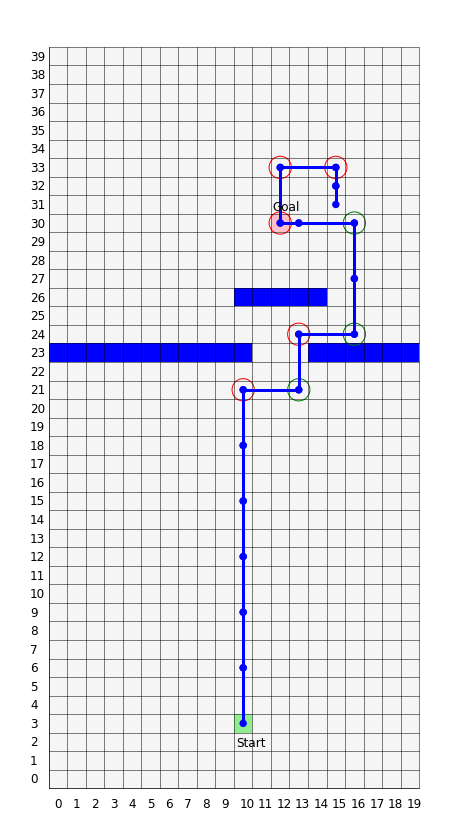

In [17]:
ma = MoveAction (factory_map)
result = ma.run_route(route)
print ("<<{}>>, {}, {}".format(result, ma.direction, ma.position))
for i in range (2):
    result = ma.move_to([TURNR])
    result = ma.move_to(MOVE3)
    print ("<<{}>>, {}, {}".format(result, ma.direction, ma.position))

result = ma.move_to([TURNR])
for i in range (5):
    result = ma.move_to(MOVE1)
    print ("<<{}>>, {}, {}".format(result, ma.direction, ma.position))

plt.show()

# 4 - An Algorithm to find a goal

Assumptions:
* This class implements a brute force recursive algorithm
* It uses the above class MoveAction to detect error conditions like CROSS or OUT
* Additionally we do not want to create moves which do not make sense like MOVER, MOVEL or 4 times MOVER
* We limit the maximum number of steps to limit computation time
* We capture 
    * Each solution we found
    * The best solution we found

In [18]:
class PathFinder:
    """
    A class to find a path
    """

    def __init__(self, factory_map=None, max_steps=3):
        """
        :param factory_map: a dictionary with the parameters of our factory map
        :param max_steps: we limit the depth of recursion to this number of steps. Otherwise it would run really long
        """
        # some fields:
        self.factory_map = factory_map
        self.ma = MoveAction (self.factory_map, False)
        self.max_steps = max_steps
        self.goal = self.factory_map['goal']

        # capture our best move & all moves to goal
        self.fastest_move = None
        self.goal_moves = []
        return None
    
    def find_solution (self, cur_move_container=None):
        """
        find shortest path - recursive approach
        :param cur_move_container: a move container with the current state of our moves
        """
        # instantiate a MoveAction class with printout = False
        # we just need it to travel around
        action = MoveAction (self.factory_map, printout=False)
        result = action.run_route (cur_move_container)
        
        # now analyse our results
        current_len = len (cur_move_container.moves) 
        if result == FOUND:
            if self.fastest_move is None or current_len < len(self.fastest_move.moves):
                # capture best move
                self.fastest_move = cur_move_container
                # we from now on limit our path to current len
                self.max_steps = current_len                
            print ('.',  end='')
            self.goal_moves.append (cur_move_container)
            return cur_move_container
        
        # some error occured
        # if we leave our factory map or cross our own path we do not want to continue
        if result in [CROSS, OUT] :
            return None
        
        # exit condition - too many steps...
        if current_len >= self.max_steps:
            return None

        # we have 4 possible steps to go:
        for move in  [TURNR, MOVE3, MOVE1, TURNL]:
            if not self.illegal_move (cur_move_container.moves, move):
                __new_move_cont = MoveContainer (initial_moves=cur_move_container.moves) # lets use a private copy
                __new_move_cont.add (move) # add our move
                # this is our recursion:
                self.find_solution (__new_move_cont) # find it
        
        # if we end up here - we failed...
        return None
    
    def illegal_move (self, moves, move):
        """
        we want to avoid moves like MOVER, MOVEL or 4 times MOVER
        :param moves: a list of moves
        :param move: a single move
        """
        l = len (moves) 
        if l < 2:
            return False
        if moves [-1] == TURNL and move == TURNR:
            return True
        if moves [-1] == TURNR and move == TURNL:
            return True
        result = True
        if l > 2 and move in [TURNL, TURNR]:
            if moves [l-3] == move and moves [l-2] == move and moves [l-1] == move:
                return True
        return False

### Try it - Run our Pathfinder with small factory map

In [19]:
factory_map_small = {}
# 0-based!
factory_map_small ['shape'] = (10,20)    # how many fields in width and height (x,y)
factory_map_small ['start'] = (5, 1)       # which is my starting field (x,y)?
factory_map_small ['goal'] = (6, 18)     # which is my finishing field (x,y)?
obs = []
for x in range (10):
    if x not in (4,5,6):
        obs.append ((x,14))
for x in range (3,7):
    obs.append ((x, 16))
factory_map_small ['obstacles'] = obs


In [20]:
pf_small = PathFinder (factory_map_small, max_steps=13)
r = pf_small.find_solution (MoveContainer(initial_moves=[]))

..........................................................................................

### Our Pathfinder knows one (of many) fastest solution:

Number of solution found: 90
Fastest solution had 13 steps


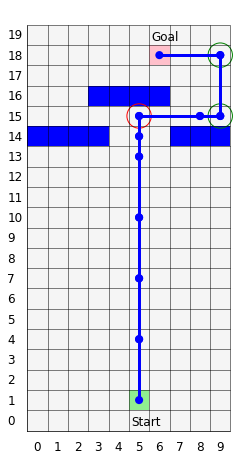

In [25]:
print ("Number of solution found: {}".format (len (pf_small.goal_moves)))
print ("Fastest solution had {} steps".format (len (pf_small.fastest_move.moves)))
action = MoveAction (factory_map_small, True, shape=(4,8))
result = action.run_route (pf_small.fastest_move)
plt.show()

### All solutions found

Fastest solution had 13 steps
Solution 1/90; 13 steps: ['m3', 'm3', 'm3', 'm3', 'm1', 'm1', 'tr', 'm3', 'm1', 'tl', 'm3', 'tl', 'm3']


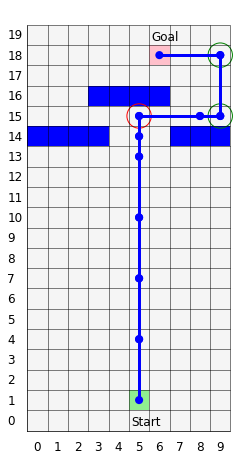

Solution 2/90; 13 steps: ['m3', 'm3', 'm3', 'm3', 'm1', 'm1', 'tr', 'm3', 'tl', 'm3', 'tl', 'm1', 'm1']


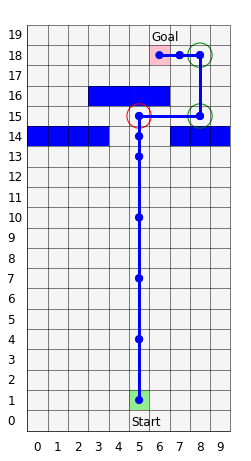

Solution 3/90; 13 steps: ['m3', 'm3', 'm3', 'm3', 'm1', 'm1', 'tr', 'm1', 'm3', 'tl', 'm3', 'tl', 'm3']


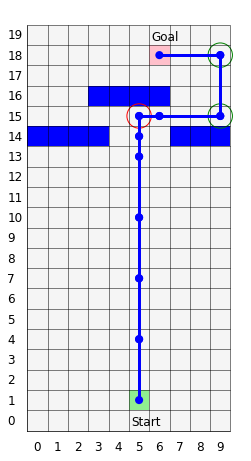

Solution 4/90; 13 steps: ['m3', 'm3', 'm3', 'm3', 'm1', 'm1', 'tr', 'm1', 'm1', 'tl', 'm3', 'tl', 'm1']


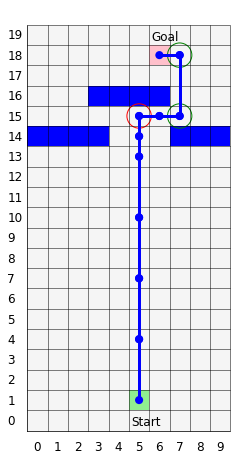

Solution 5/90; 13 steps: ['m3', 'm3', 'm3', 'm3', 'm1', 'm1', 'tl', 'm3', 'tr', 'm3', 'tr', 'm3', 'm1']


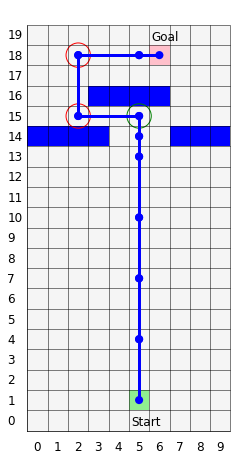

Solution 6/90; 13 steps: ['m3', 'm3', 'm3', 'm3', 'm1', 'm1', 'tl', 'm3', 'tr', 'm3', 'tr', 'm1', 'm3']


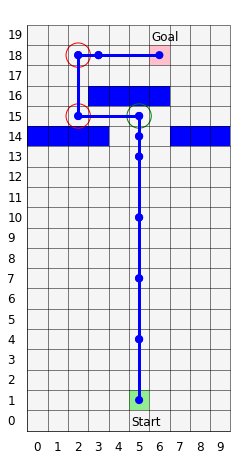

Solution 7/90; 13 steps: ['m3', 'm3', 'm3', 'm1', 'm3', 'm1', 'tr', 'm3', 'm1', 'tl', 'm3', 'tl', 'm3']


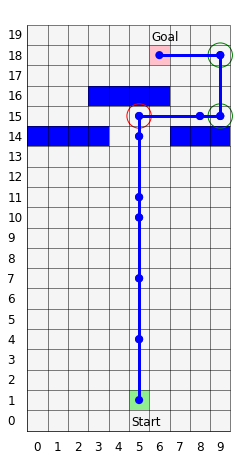

Solution 8/90; 13 steps: ['m3', 'm3', 'm3', 'm1', 'm3', 'm1', 'tr', 'm3', 'tl', 'm3', 'tl', 'm1', 'm1']


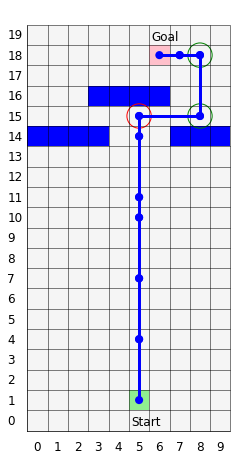

Solution 9/90; 13 steps: ['m3', 'm3', 'm3', 'm1', 'm3', 'm1', 'tr', 'm1', 'm3', 'tl', 'm3', 'tl', 'm3']


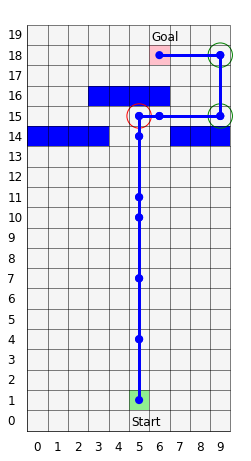

Solution 10/90; 13 steps: ['m3', 'm3', 'm3', 'm1', 'm3', 'm1', 'tr', 'm1', 'm1', 'tl', 'm3', 'tl', 'm1']


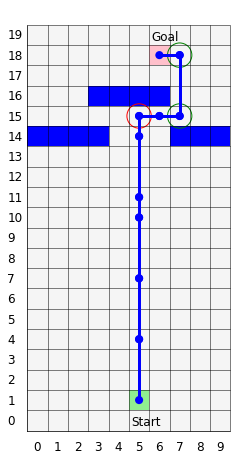

Solution 11/90; 13 steps: ['m3', 'm3', 'm3', 'm1', 'm3', 'm1', 'tl', 'm3', 'tr', 'm3', 'tr', 'm3', 'm1']


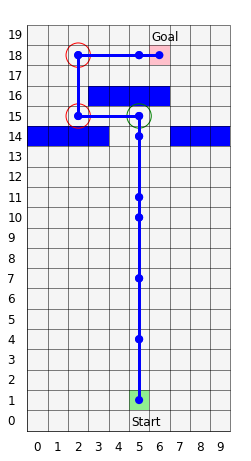

Solution 12/90; 13 steps: ['m3', 'm3', 'm3', 'm1', 'm3', 'm1', 'tl', 'm3', 'tr', 'm3', 'tr', 'm1', 'm3']


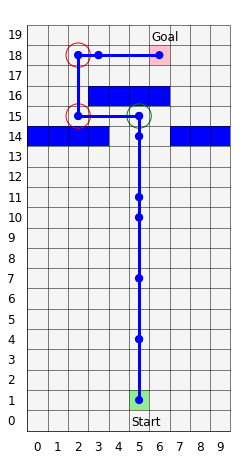

Solution 13/90; 13 steps: ['m3', 'm3', 'm3', 'm1', 'm1', 'm3', 'tr', 'm3', 'm1', 'tl', 'm3', 'tl', 'm3']


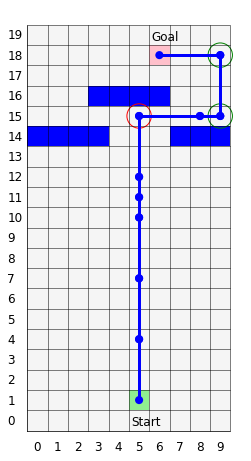

Solution 14/90; 13 steps: ['m3', 'm3', 'm3', 'm1', 'm1', 'm3', 'tr', 'm3', 'tl', 'm3', 'tl', 'm1', 'm1']


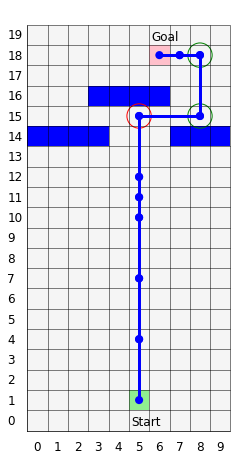

Solution 15/90; 13 steps: ['m3', 'm3', 'm3', 'm1', 'm1', 'm3', 'tr', 'm1', 'm3', 'tl', 'm3', 'tl', 'm3']


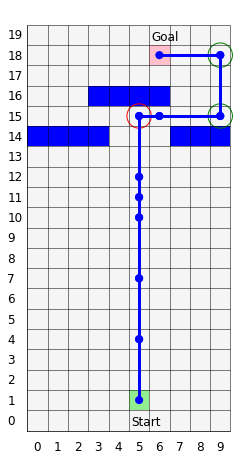

Solution 16/90; 13 steps: ['m3', 'm3', 'm3', 'm1', 'm1', 'm3', 'tr', 'm1', 'm1', 'tl', 'm3', 'tl', 'm1']


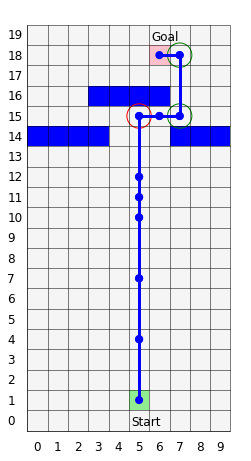

Solution 17/90; 13 steps: ['m3', 'm3', 'm3', 'm1', 'm1', 'm3', 'tl', 'm3', 'tr', 'm3', 'tr', 'm3', 'm1']


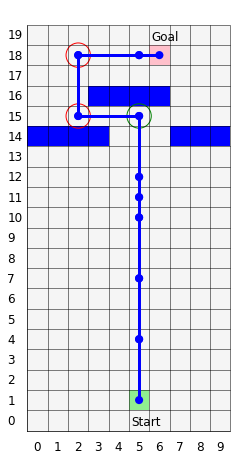

Solution 18/90; 13 steps: ['m3', 'm3', 'm3', 'm1', 'm1', 'm3', 'tl', 'm3', 'tr', 'm3', 'tr', 'm1', 'm3']


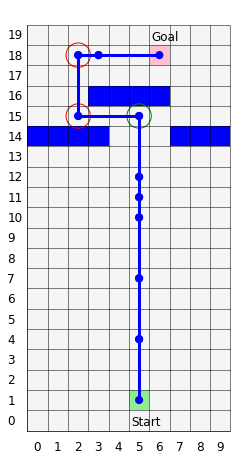

Solution 19/90; 13 steps: ['m3', 'm3', 'm1', 'm3', 'm3', 'm1', 'tr', 'm3', 'm1', 'tl', 'm3', 'tl', 'm3']


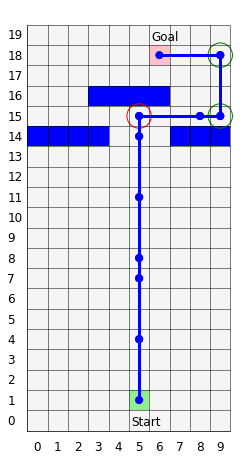

Solution 20/90; 13 steps: ['m3', 'm3', 'm1', 'm3', 'm3', 'm1', 'tr', 'm3', 'tl', 'm3', 'tl', 'm1', 'm1']


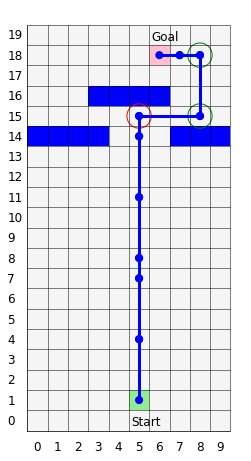

Solution 21/90; 13 steps: ['m3', 'm3', 'm1', 'm3', 'm3', 'm1', 'tr', 'm1', 'm3', 'tl', 'm3', 'tl', 'm3']


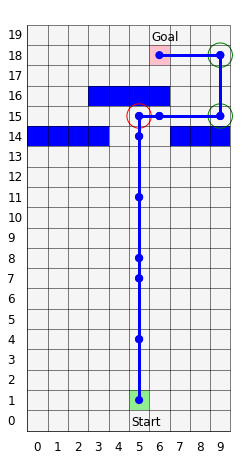

Solution 22/90; 13 steps: ['m3', 'm3', 'm1', 'm3', 'm3', 'm1', 'tr', 'm1', 'm1', 'tl', 'm3', 'tl', 'm1']


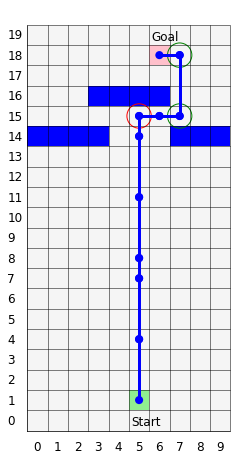

Solution 23/90; 13 steps: ['m3', 'm3', 'm1', 'm3', 'm3', 'm1', 'tl', 'm3', 'tr', 'm3', 'tr', 'm3', 'm1']


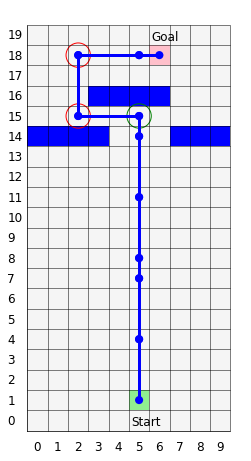

Solution 24/90; 13 steps: ['m3', 'm3', 'm1', 'm3', 'm3', 'm1', 'tl', 'm3', 'tr', 'm3', 'tr', 'm1', 'm3']


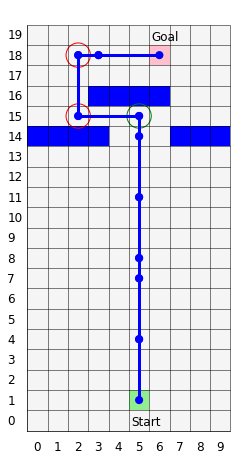

Solution 25/90; 13 steps: ['m3', 'm3', 'm1', 'm3', 'm1', 'm3', 'tr', 'm3', 'm1', 'tl', 'm3', 'tl', 'm3']


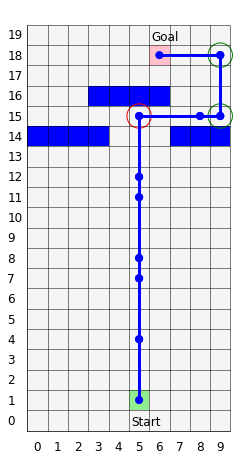

Solution 26/90; 13 steps: ['m3', 'm3', 'm1', 'm3', 'm1', 'm3', 'tr', 'm3', 'tl', 'm3', 'tl', 'm1', 'm1']


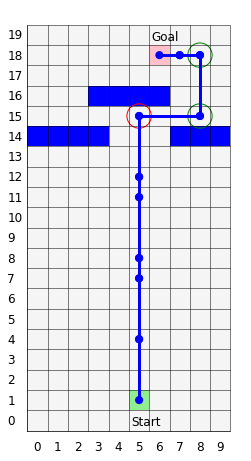

Solution 27/90; 13 steps: ['m3', 'm3', 'm1', 'm3', 'm1', 'm3', 'tr', 'm1', 'm3', 'tl', 'm3', 'tl', 'm3']


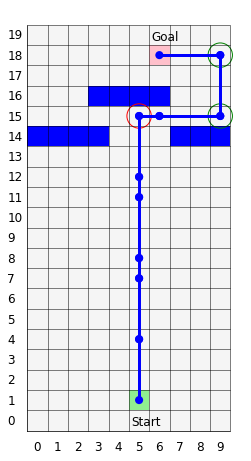

Solution 28/90; 13 steps: ['m3', 'm3', 'm1', 'm3', 'm1', 'm3', 'tr', 'm1', 'm1', 'tl', 'm3', 'tl', 'm1']


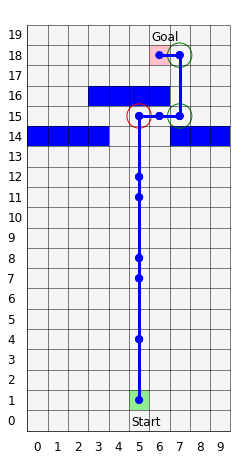

Solution 29/90; 13 steps: ['m3', 'm3', 'm1', 'm3', 'm1', 'm3', 'tl', 'm3', 'tr', 'm3', 'tr', 'm3', 'm1']


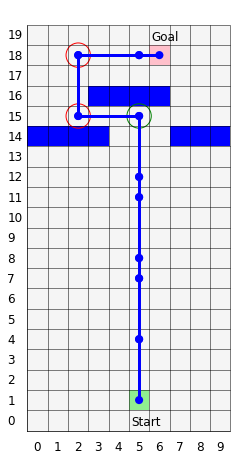

Solution 30/90; 13 steps: ['m3', 'm3', 'm1', 'm3', 'm1', 'm3', 'tl', 'm3', 'tr', 'm3', 'tr', 'm1', 'm3']


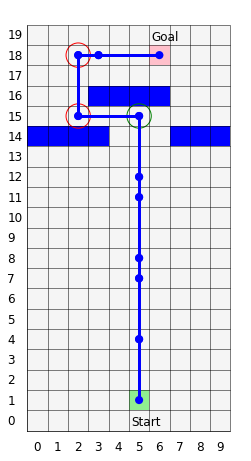

Solution 31/90; 13 steps: ['m3', 'm3', 'm1', 'm1', 'm3', 'm3', 'tr', 'm3', 'm1', 'tl', 'm3', 'tl', 'm3']


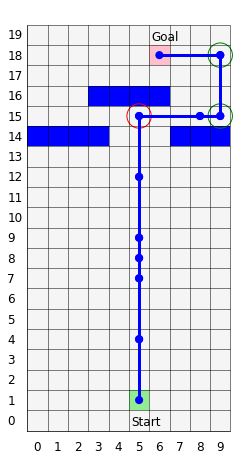

Solution 32/90; 13 steps: ['m3', 'm3', 'm1', 'm1', 'm3', 'm3', 'tr', 'm3', 'tl', 'm3', 'tl', 'm1', 'm1']


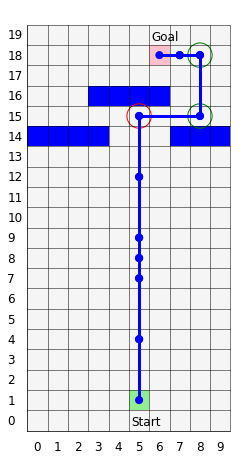

Solution 33/90; 13 steps: ['m3', 'm3', 'm1', 'm1', 'm3', 'm3', 'tr', 'm1', 'm3', 'tl', 'm3', 'tl', 'm3']


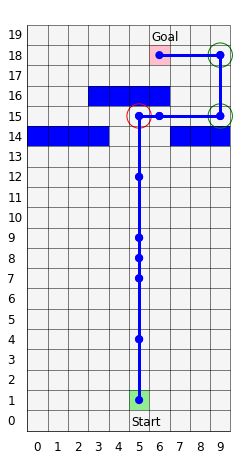

Solution 34/90; 13 steps: ['m3', 'm3', 'm1', 'm1', 'm3', 'm3', 'tr', 'm1', 'm1', 'tl', 'm3', 'tl', 'm1']


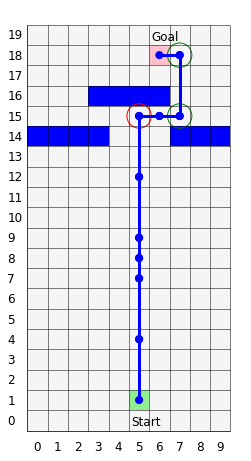

Solution 35/90; 13 steps: ['m3', 'm3', 'm1', 'm1', 'm3', 'm3', 'tl', 'm3', 'tr', 'm3', 'tr', 'm3', 'm1']


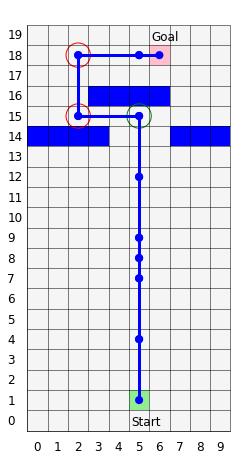

Solution 36/90; 13 steps: ['m3', 'm3', 'm1', 'm1', 'm3', 'm3', 'tl', 'm3', 'tr', 'm3', 'tr', 'm1', 'm3']


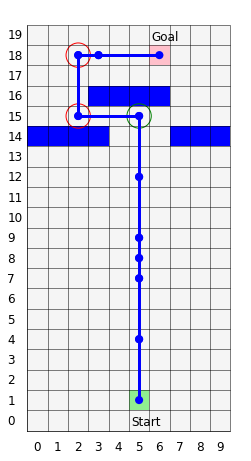

Solution 37/90; 13 steps: ['m3', 'm1', 'm3', 'm3', 'm3', 'm1', 'tr', 'm3', 'm1', 'tl', 'm3', 'tl', 'm3']


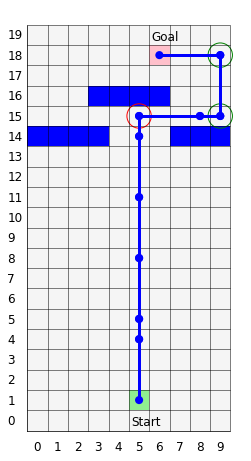

Solution 38/90; 13 steps: ['m3', 'm1', 'm3', 'm3', 'm3', 'm1', 'tr', 'm3', 'tl', 'm3', 'tl', 'm1', 'm1']


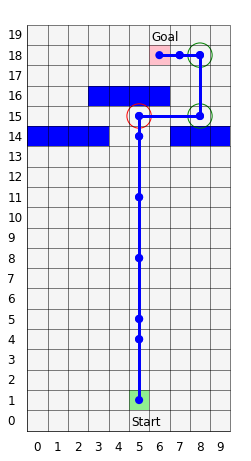

Solution 39/90; 13 steps: ['m3', 'm1', 'm3', 'm3', 'm3', 'm1', 'tr', 'm1', 'm3', 'tl', 'm3', 'tl', 'm3']


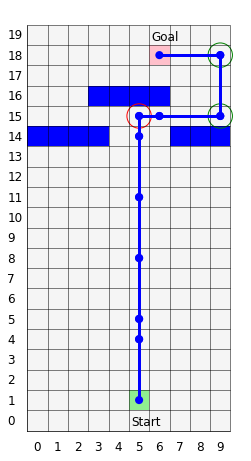

Solution 40/90; 13 steps: ['m3', 'm1', 'm3', 'm3', 'm3', 'm1', 'tr', 'm1', 'm1', 'tl', 'm3', 'tl', 'm1']


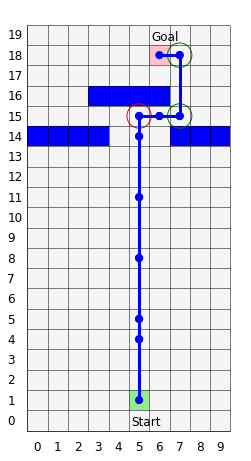

Solution 41/90; 13 steps: ['m3', 'm1', 'm3', 'm3', 'm3', 'm1', 'tl', 'm3', 'tr', 'm3', 'tr', 'm3', 'm1']


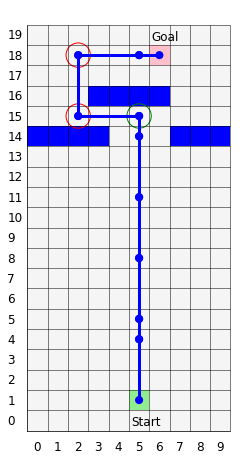

Solution 42/90; 13 steps: ['m3', 'm1', 'm3', 'm3', 'm3', 'm1', 'tl', 'm3', 'tr', 'm3', 'tr', 'm1', 'm3']


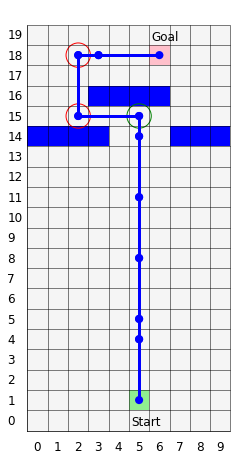

Solution 43/90; 13 steps: ['m3', 'm1', 'm3', 'm3', 'm1', 'm3', 'tr', 'm3', 'm1', 'tl', 'm3', 'tl', 'm3']


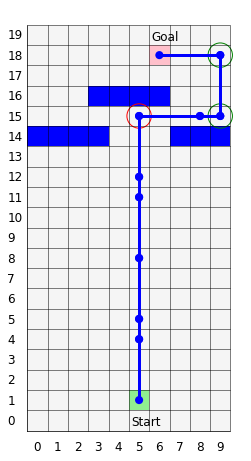

Solution 44/90; 13 steps: ['m3', 'm1', 'm3', 'm3', 'm1', 'm3', 'tr', 'm3', 'tl', 'm3', 'tl', 'm1', 'm1']


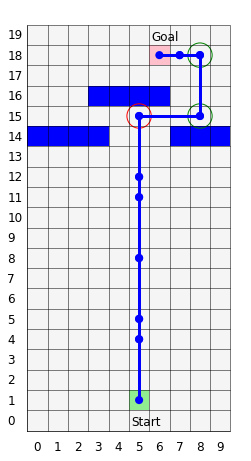

Solution 45/90; 13 steps: ['m3', 'm1', 'm3', 'm3', 'm1', 'm3', 'tr', 'm1', 'm3', 'tl', 'm3', 'tl', 'm3']


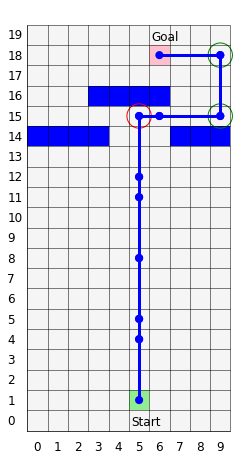

Solution 46/90; 13 steps: ['m3', 'm1', 'm3', 'm3', 'm1', 'm3', 'tr', 'm1', 'm1', 'tl', 'm3', 'tl', 'm1']


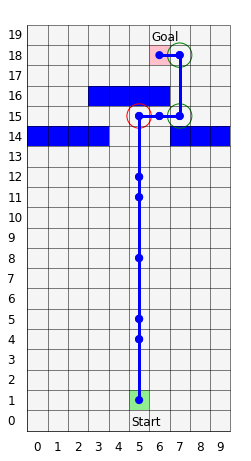

Solution 47/90; 13 steps: ['m3', 'm1', 'm3', 'm3', 'm1', 'm3', 'tl', 'm3', 'tr', 'm3', 'tr', 'm3', 'm1']


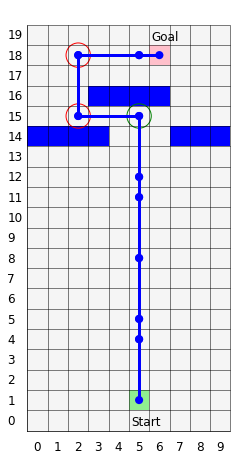

Solution 48/90; 13 steps: ['m3', 'm1', 'm3', 'm3', 'm1', 'm3', 'tl', 'm3', 'tr', 'm3', 'tr', 'm1', 'm3']


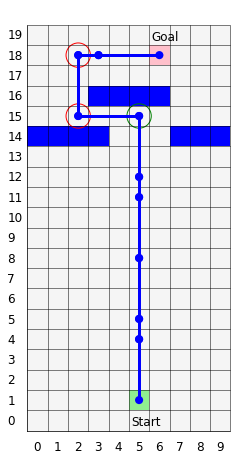

Solution 49/90; 13 steps: ['m3', 'm1', 'm3', 'm1', 'm3', 'm3', 'tr', 'm3', 'm1', 'tl', 'm3', 'tl', 'm3']


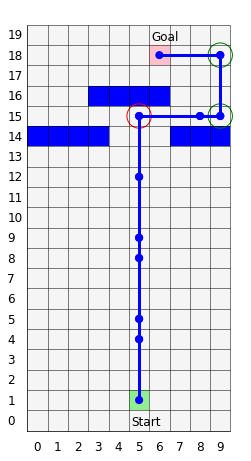

Solution 50/90; 13 steps: ['m3', 'm1', 'm3', 'm1', 'm3', 'm3', 'tr', 'm3', 'tl', 'm3', 'tl', 'm1', 'm1']


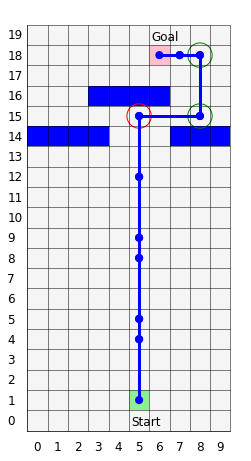

Solution 51/90; 13 steps: ['m3', 'm1', 'm3', 'm1', 'm3', 'm3', 'tr', 'm1', 'm3', 'tl', 'm3', 'tl', 'm3']


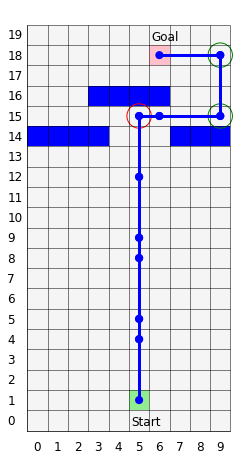

Solution 52/90; 13 steps: ['m3', 'm1', 'm3', 'm1', 'm3', 'm3', 'tr', 'm1', 'm1', 'tl', 'm3', 'tl', 'm1']


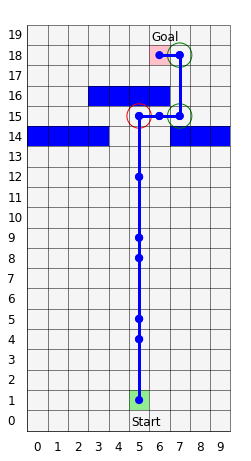

Solution 53/90; 13 steps: ['m3', 'm1', 'm3', 'm1', 'm3', 'm3', 'tl', 'm3', 'tr', 'm3', 'tr', 'm3', 'm1']


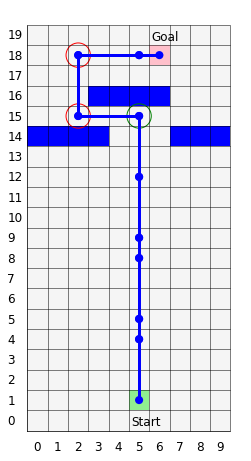

Solution 54/90; 13 steps: ['m3', 'm1', 'm3', 'm1', 'm3', 'm3', 'tl', 'm3', 'tr', 'm3', 'tr', 'm1', 'm3']


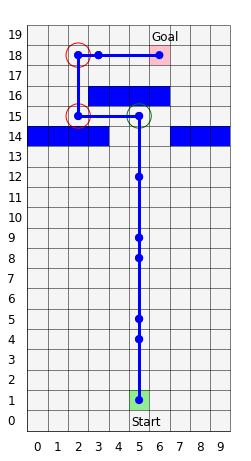

Solution 55/90; 13 steps: ['m3', 'm1', 'm1', 'm3', 'm3', 'm3', 'tr', 'm3', 'm1', 'tl', 'm3', 'tl', 'm3']


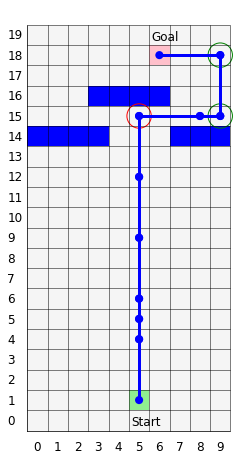

Solution 56/90; 13 steps: ['m3', 'm1', 'm1', 'm3', 'm3', 'm3', 'tr', 'm3', 'tl', 'm3', 'tl', 'm1', 'm1']


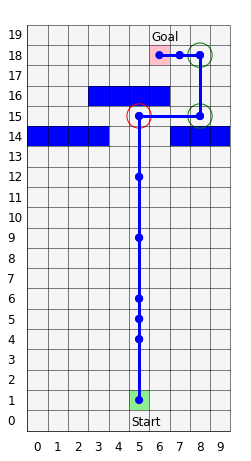

Solution 57/90; 13 steps: ['m3', 'm1', 'm1', 'm3', 'm3', 'm3', 'tr', 'm1', 'm3', 'tl', 'm3', 'tl', 'm3']


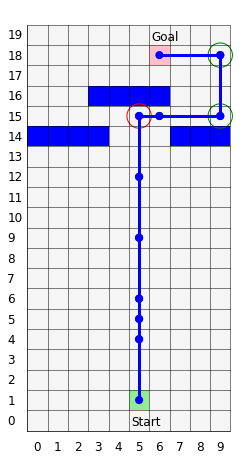

Solution 58/90; 13 steps: ['m3', 'm1', 'm1', 'm3', 'm3', 'm3', 'tr', 'm1', 'm1', 'tl', 'm3', 'tl', 'm1']


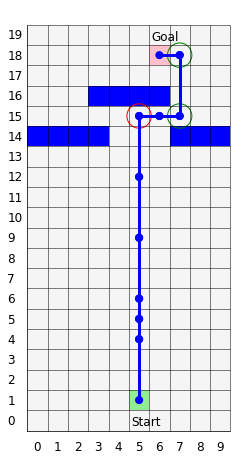

Solution 59/90; 13 steps: ['m3', 'm1', 'm1', 'm3', 'm3', 'm3', 'tl', 'm3', 'tr', 'm3', 'tr', 'm3', 'm1']


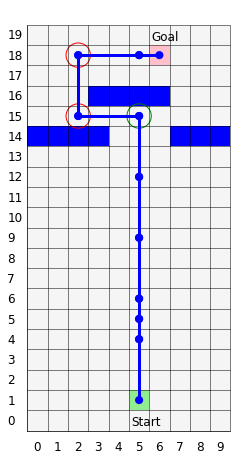

Solution 60/90; 13 steps: ['m3', 'm1', 'm1', 'm3', 'm3', 'm3', 'tl', 'm3', 'tr', 'm3', 'tr', 'm1', 'm3']


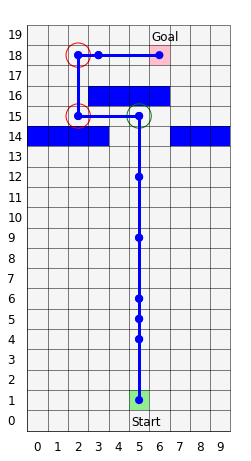

Solution 61/90; 13 steps: ['m1', 'm3', 'm3', 'm3', 'm3', 'm1', 'tr', 'm3', 'm1', 'tl', 'm3', 'tl', 'm3']


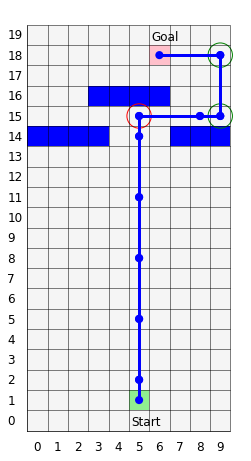

Solution 62/90; 13 steps: ['m1', 'm3', 'm3', 'm3', 'm3', 'm1', 'tr', 'm3', 'tl', 'm3', 'tl', 'm1', 'm1']


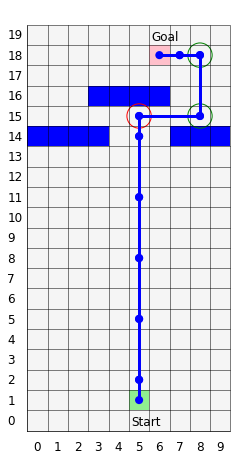

Solution 63/90; 13 steps: ['m1', 'm3', 'm3', 'm3', 'm3', 'm1', 'tr', 'm1', 'm3', 'tl', 'm3', 'tl', 'm3']


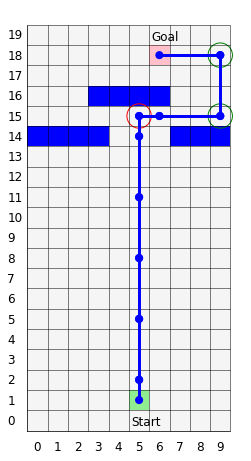

Solution 64/90; 13 steps: ['m1', 'm3', 'm3', 'm3', 'm3', 'm1', 'tr', 'm1', 'm1', 'tl', 'm3', 'tl', 'm1']


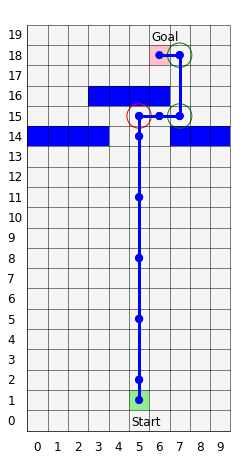

Solution 65/90; 13 steps: ['m1', 'm3', 'm3', 'm3', 'm3', 'm1', 'tl', 'm3', 'tr', 'm3', 'tr', 'm3', 'm1']


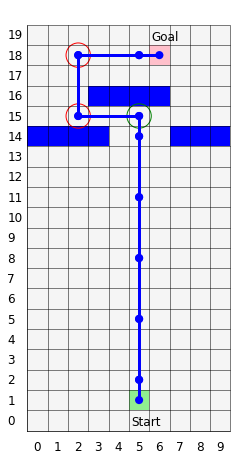

Solution 66/90; 13 steps: ['m1', 'm3', 'm3', 'm3', 'm3', 'm1', 'tl', 'm3', 'tr', 'm3', 'tr', 'm1', 'm3']


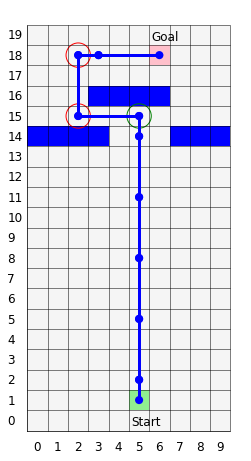

Solution 67/90; 13 steps: ['m1', 'm3', 'm3', 'm3', 'm1', 'm3', 'tr', 'm3', 'm1', 'tl', 'm3', 'tl', 'm3']


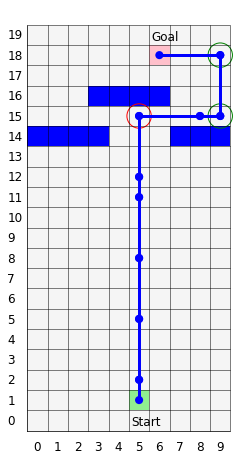

Solution 68/90; 13 steps: ['m1', 'm3', 'm3', 'm3', 'm1', 'm3', 'tr', 'm3', 'tl', 'm3', 'tl', 'm1', 'm1']


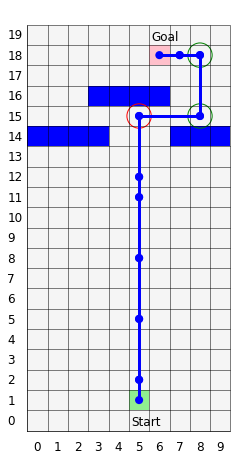

Solution 69/90; 13 steps: ['m1', 'm3', 'm3', 'm3', 'm1', 'm3', 'tr', 'm1', 'm3', 'tl', 'm3', 'tl', 'm3']


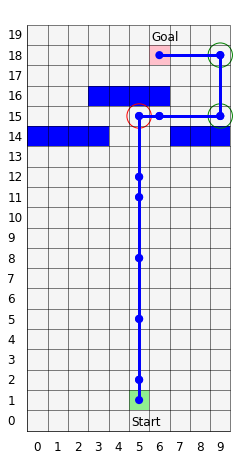

Solution 70/90; 13 steps: ['m1', 'm3', 'm3', 'm3', 'm1', 'm3', 'tr', 'm1', 'm1', 'tl', 'm3', 'tl', 'm1']


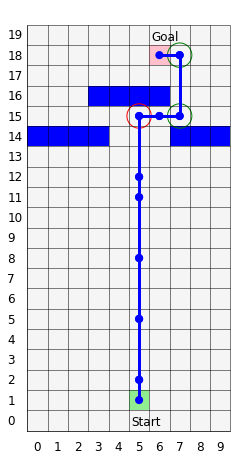

Solution 71/90; 13 steps: ['m1', 'm3', 'm3', 'm3', 'm1', 'm3', 'tl', 'm3', 'tr', 'm3', 'tr', 'm3', 'm1']


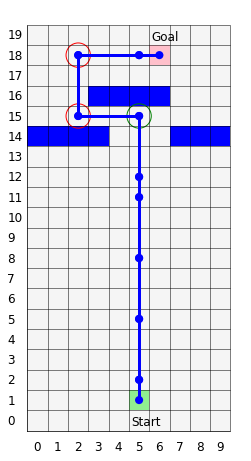

Solution 72/90; 13 steps: ['m1', 'm3', 'm3', 'm3', 'm1', 'm3', 'tl', 'm3', 'tr', 'm3', 'tr', 'm1', 'm3']


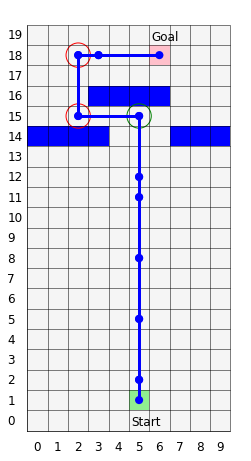

Solution 73/90; 13 steps: ['m1', 'm3', 'm3', 'm1', 'm3', 'm3', 'tr', 'm3', 'm1', 'tl', 'm3', 'tl', 'm3']


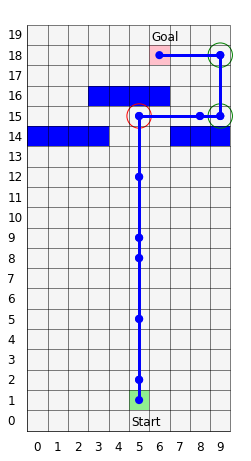

Solution 74/90; 13 steps: ['m1', 'm3', 'm3', 'm1', 'm3', 'm3', 'tr', 'm3', 'tl', 'm3', 'tl', 'm1', 'm1']


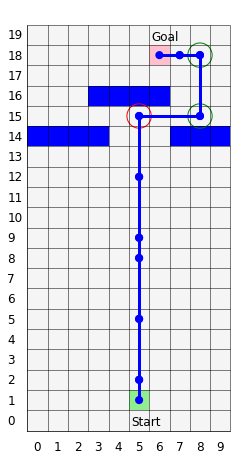

Solution 75/90; 13 steps: ['m1', 'm3', 'm3', 'm1', 'm3', 'm3', 'tr', 'm1', 'm3', 'tl', 'm3', 'tl', 'm3']


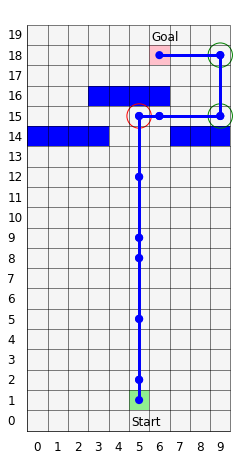

Solution 76/90; 13 steps: ['m1', 'm3', 'm3', 'm1', 'm3', 'm3', 'tr', 'm1', 'm1', 'tl', 'm3', 'tl', 'm1']


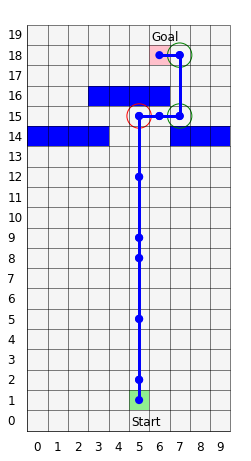

Solution 77/90; 13 steps: ['m1', 'm3', 'm3', 'm1', 'm3', 'm3', 'tl', 'm3', 'tr', 'm3', 'tr', 'm3', 'm1']


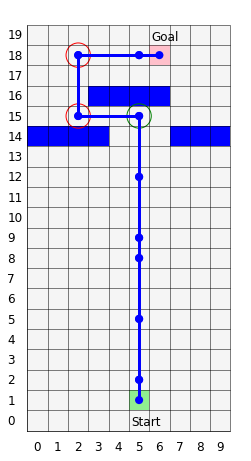

Solution 78/90; 13 steps: ['m1', 'm3', 'm3', 'm1', 'm3', 'm3', 'tl', 'm3', 'tr', 'm3', 'tr', 'm1', 'm3']


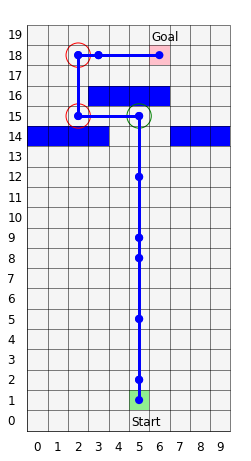

Solution 79/90; 13 steps: ['m1', 'm3', 'm1', 'm3', 'm3', 'm3', 'tr', 'm3', 'm1', 'tl', 'm3', 'tl', 'm3']


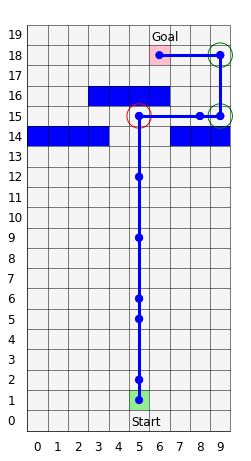

Solution 80/90; 13 steps: ['m1', 'm3', 'm1', 'm3', 'm3', 'm3', 'tr', 'm3', 'tl', 'm3', 'tl', 'm1', 'm1']


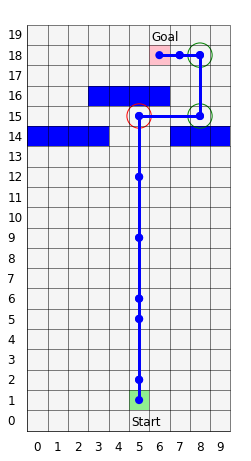

Solution 81/90; 13 steps: ['m1', 'm3', 'm1', 'm3', 'm3', 'm3', 'tr', 'm1', 'm3', 'tl', 'm3', 'tl', 'm3']


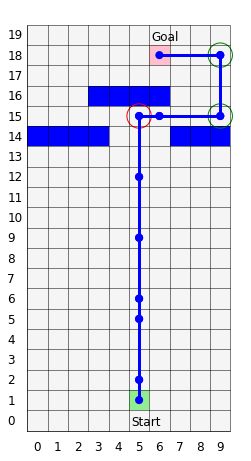

Solution 82/90; 13 steps: ['m1', 'm3', 'm1', 'm3', 'm3', 'm3', 'tr', 'm1', 'm1', 'tl', 'm3', 'tl', 'm1']


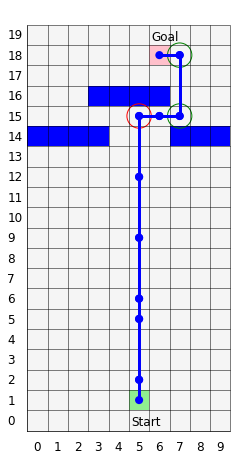

Solution 83/90; 13 steps: ['m1', 'm3', 'm1', 'm3', 'm3', 'm3', 'tl', 'm3', 'tr', 'm3', 'tr', 'm3', 'm1']


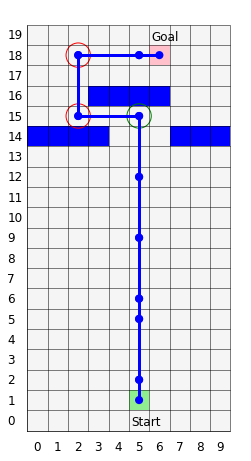

Solution 84/90; 13 steps: ['m1', 'm3', 'm1', 'm3', 'm3', 'm3', 'tl', 'm3', 'tr', 'm3', 'tr', 'm1', 'm3']


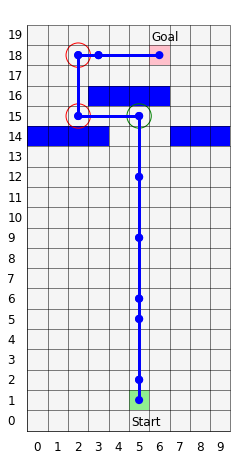

Solution 85/90; 13 steps: ['m1', 'm1', 'm3', 'm3', 'm3', 'm3', 'tr', 'm3', 'm1', 'tl', 'm3', 'tl', 'm3']


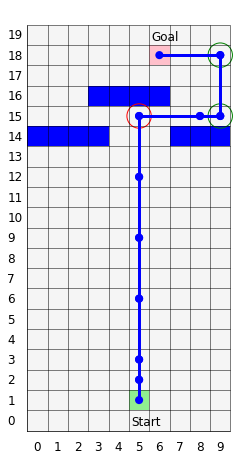

Solution 86/90; 13 steps: ['m1', 'm1', 'm3', 'm3', 'm3', 'm3', 'tr', 'm3', 'tl', 'm3', 'tl', 'm1', 'm1']


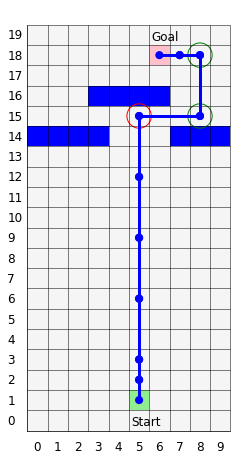

Solution 87/90; 13 steps: ['m1', 'm1', 'm3', 'm3', 'm3', 'm3', 'tr', 'm1', 'm3', 'tl', 'm3', 'tl', 'm3']


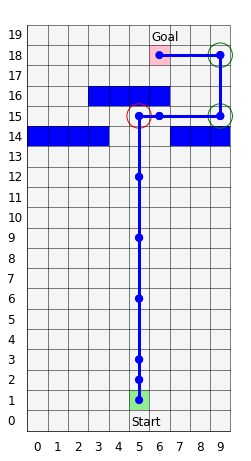

Solution 88/90; 13 steps: ['m1', 'm1', 'm3', 'm3', 'm3', 'm3', 'tr', 'm1', 'm1', 'tl', 'm3', 'tl', 'm1']


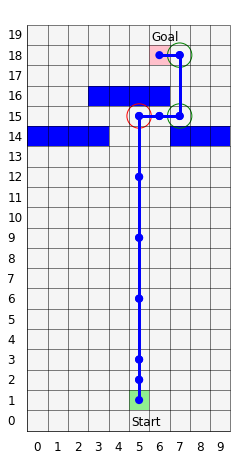

Solution 89/90; 13 steps: ['m1', 'm1', 'm3', 'm3', 'm3', 'm3', 'tl', 'm3', 'tr', 'm3', 'tr', 'm3', 'm1']


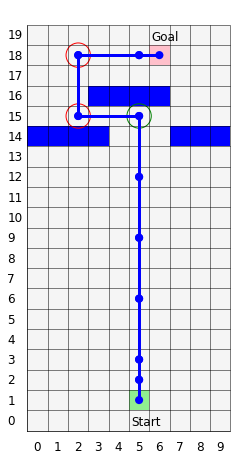

Solution 90/90; 13 steps: ['m1', 'm1', 'm3', 'm3', 'm3', 'm3', 'tl', 'm3', 'tr', 'm3', 'tr', 'm1', 'm3']


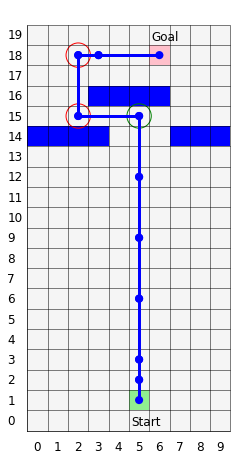

In [26]:
print ("Fastest solution had {} steps".format (len (pf_small.fastest_move.moves)))
for idx, sol in enumerate (pf_small.goal_moves):
    action = MoveAction (factory_map_small, True, shape=(4,8))
    result = action.run_route (sol)
    l = len (sol.moves)
    print ("Solution {}/{}; {} steps: {}".format (idx+1, len(pf_small.goal_moves), l, sol.moves))
    plt.show()


### Now run the Pathfinder for our big factory map

In [27]:
pf = PathFinder (factory_map, max_steps=19)
r = pf.find_solution (MoveContainer(initial_moves=[MOVE3, MOVE3, MOVE3, MOVE3, MOVE3, MOVE3]))

............

### Our Pathfinder knows one (of many) fastest solution:

Number of solution found: 12
Fastest solution had 18 steps


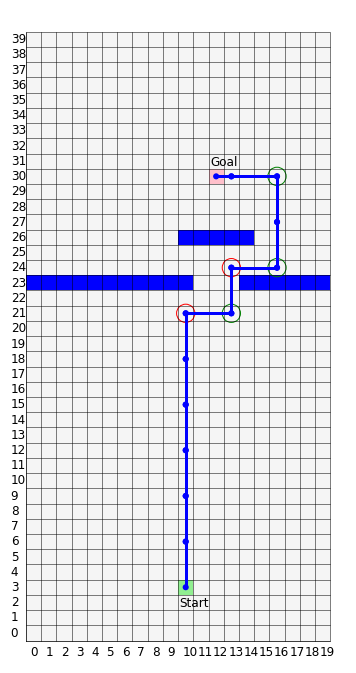

In [30]:
print ("Number of solution found: {}".format (len (pf.goal_moves)))
print ("Fastest solution had {} steps".format (len (pf.fastest_move.moves)))
action = MoveAction (factory_map, True, shape=(6,12))
result = action.run_route (pf.fastest_move)
plt.show()

### Now lets look at all solutions we found:

Solution 1/12; 18 steps: ['m3', 'm3', 'm3', 'm3', 'm3', 'm3', 'tr', 'm3', 'tl', 'm3', 'tr', 'm3', 'tl', 'm3', 'm3', 'tl', 'm3', 'm1']


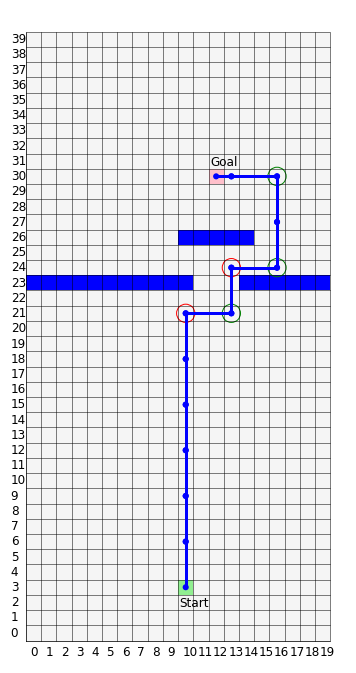

Solution 2/12; 18 steps: ['m3', 'm3', 'm3', 'm3', 'm3', 'm3', 'tr', 'm3', 'tl', 'm3', 'tr', 'm3', 'tl', 'm3', 'm3', 'tl', 'm1', 'm3']


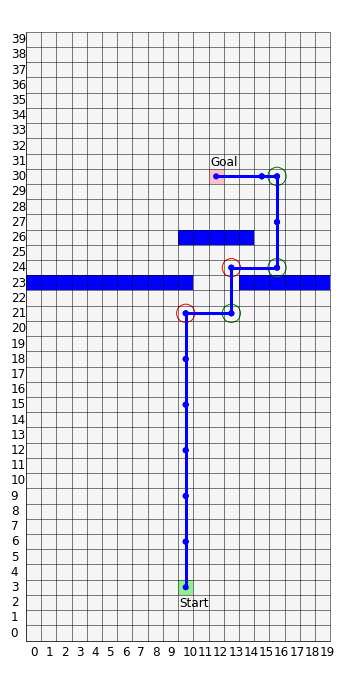

Solution 3/12; 18 steps: ['m3', 'm3', 'm3', 'm3', 'm3', 'm3', 'tr', 'm3', 'tl', 'm3', 'tr', 'm1', 'm1', 'tl', 'm3', 'm3', 'tl', 'm3']


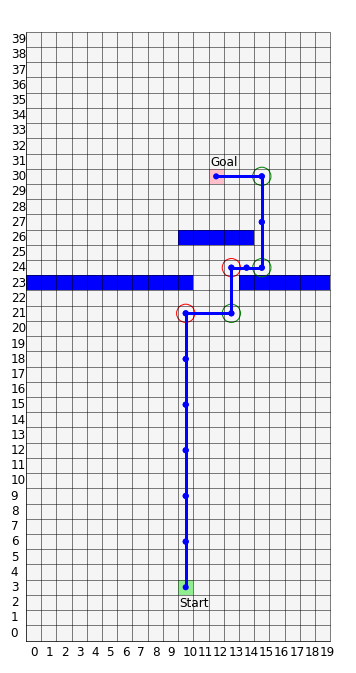

Solution 4/12; 18 steps: ['m3', 'm3', 'm3', 'm3', 'm3', 'm3', 'tr', 'm3', 'tl', 'm3', 'tl', 'm3', 'm1', 'tr', 'm3', 'm3', 'tr', 'm3']


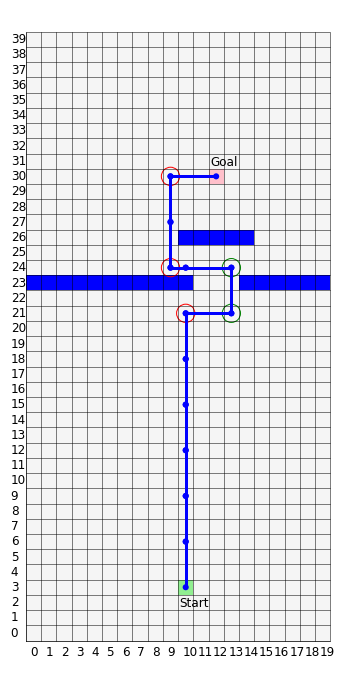

Solution 5/12; 18 steps: ['m3', 'm3', 'm3', 'm3', 'm3', 'm3', 'tr', 'm3', 'tl', 'm3', 'tl', 'm1', 'm3', 'tr', 'm3', 'm3', 'tr', 'm3']


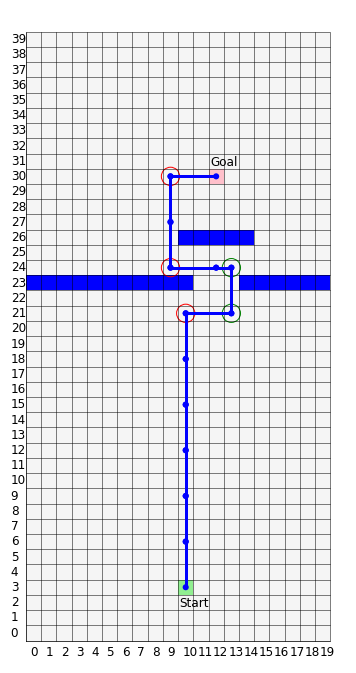

Solution 6/12; 18 steps: ['m3', 'm3', 'm3', 'm3', 'm3', 'm3', 'tr', 'm1', 'm1', 'tl', 'm3', 'tr', 'm3', 'tl', 'm3', 'm3', 'tl', 'm3']


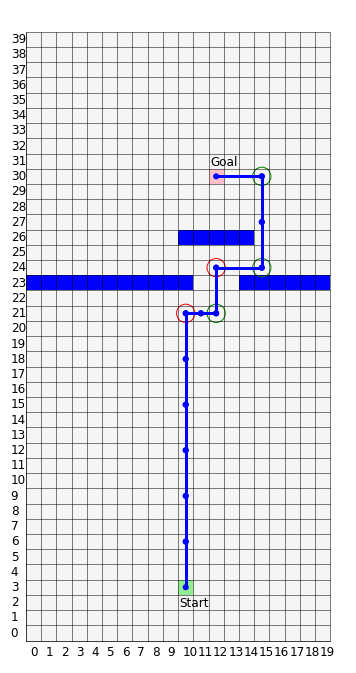

Solution 7/12; 18 steps: ['m3', 'm3', 'm3', 'm3', 'm3', 'm3', 'tr', 'm1', 'm1', 'tl', 'm3', 'tl', 'm3', 'tr', 'm3', 'm3', 'tr', 'm3']


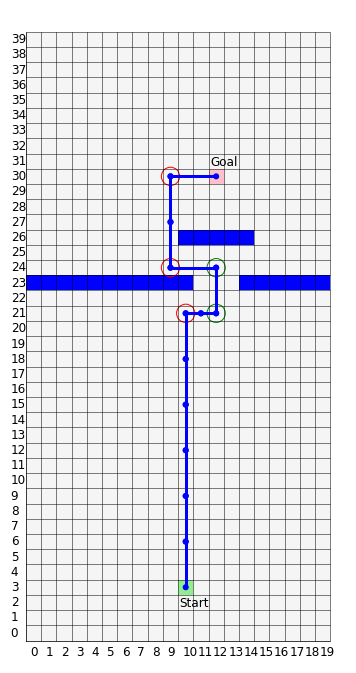

Solution 8/12; 18 steps: ['m3', 'm3', 'm3', 'm3', 'm3', 'm3', 'tr', 'm1', 'tl', 'm3', 'tr', 'm3', 'm1', 'tl', 'm3', 'm3', 'tl', 'm3']


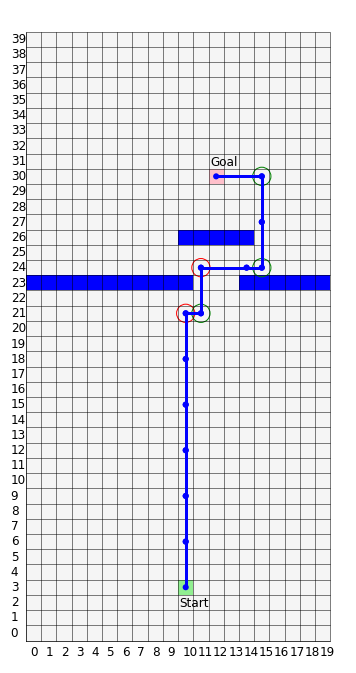

Solution 9/12; 18 steps: ['m3', 'm3', 'm3', 'm3', 'm3', 'm3', 'tr', 'm1', 'tl', 'm3', 'tr', 'm1', 'm3', 'tl', 'm3', 'm3', 'tl', 'm3']


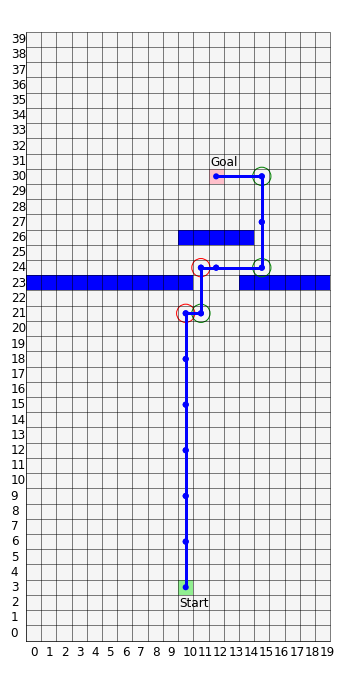

Solution 10/12; 18 steps: ['m3', 'm3', 'm3', 'm3', 'm3', 'm3', 'tr', 'm1', 'tl', 'm3', 'tl', 'm3', 'tr', 'm3', 'm3', 'tr', 'm3', 'm1']


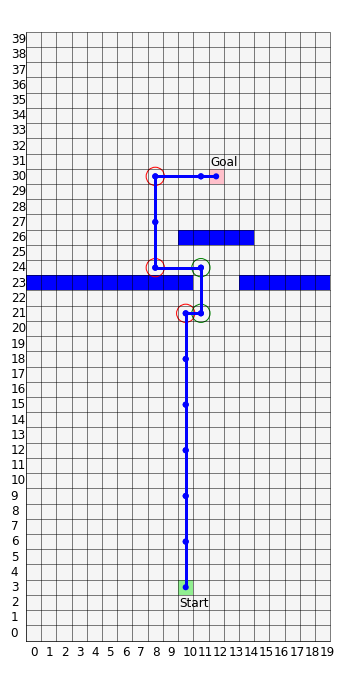

Solution 11/12; 18 steps: ['m3', 'm3', 'm3', 'm3', 'm3', 'm3', 'tr', 'm1', 'tl', 'm3', 'tl', 'm3', 'tr', 'm3', 'm3', 'tr', 'm1', 'm3']


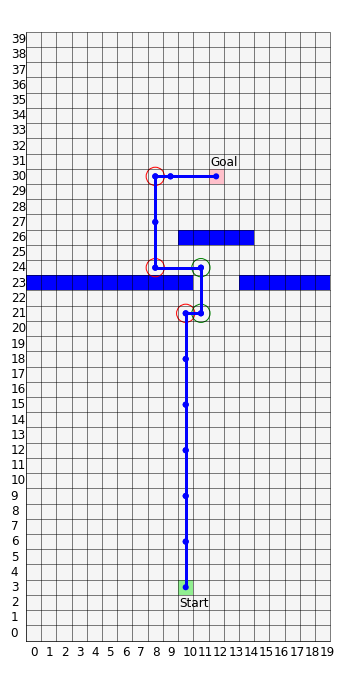

Solution 12/12; 18 steps: ['m3', 'm3', 'm3', 'm3', 'm3', 'm3', 'tr', 'm1', 'tl', 'm3', 'tl', 'm1', 'm1', 'tr', 'm3', 'm3', 'tr', 'm3']


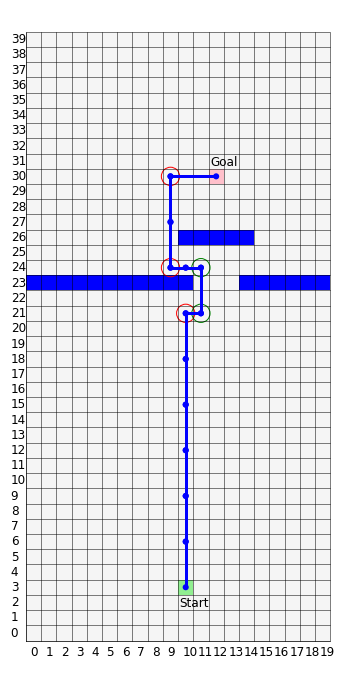

In [29]:
for idx, sol in enumerate (pf.goal_moves):
    action = MoveAction (factory_map, True, shape=(6,12))
    result = action.run_route (sol)
    l = len (sol.moves)
    print ("Solution {}/{}; {} steps: {}".format (idx+1, len(pf.goal_moves), l, sol.moves))
    plt.show()


Thoughts on tasks:
- cost funtion: 1-move; 3-move; turn-left; turn-right;
- color all fields your algorithm touched
- show result
- show result with choosen steps (according to cost)

Input: 
- variable
- json
- graphical interface (by clicking on squares) | needs save and load function

(1st) Solution:
- brute force

Obstacles:
- might take too long searching path
- is this the best path?
- Ideas on how to limit

Optimization:
- how can you optimize search (e.g. by always hidding towards the object no matter if there is an obstacle
- Tiebreaker

Using an algorithm:
- try another known algorithm, e.g.
    - Dijkstraâ€™s Algorithm 
    - Greedy Best-First-Search algorithm
    - A * Algorithm

More:
http://theory.stanford.edu/~amitp/GameProgramming/AStarComparison.html

https://en.wikipedia.org/wiki/A*_search_algorithm



# Sources
https://matplotlib.org/

https://docs.python.org/3/

https://gist.github.com/paulochf/f6c9ed0b39f85dd85270

https://www.redblobgames.com/pathfinding/a-star/introduction.html

# Credentials
This Dojo was taken from (my memory about) a Challenge of "Bundeswettbewerb Informatik" which I participated in the late 80ties.